In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Розширення розмірності
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Підготовка міток
num_classes = 10
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 122ms/step - accuracy: 0.6488 - loss: 0.9918 - val_accuracy: 0.8373 - val_loss: 0.4466
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.8265 - loss: 0.4845 - val_accuracy: 0.8548 - val_loss: 0.3978
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.8530 - loss: 0.4118 - val_accuracy: 0.8705 - val_loss: 0.3579
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.8635 - loss: 0.3857 - val_accuracy: 0.8802 - val_loss: 0.3352
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.8696 - loss: 0.3663 - val_accuracy: 0.8832 - val_loss: 0.3223
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.8752 - loss: 0.3475 - val_accuracy: 0.8885 - val_loss: 0.3074
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.8843 - loss: 0.3268 - val_accuracy: 0.8920 - val_loss: 0.3002
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 108ms/step - accuracy: 0.8863 - loss: 0

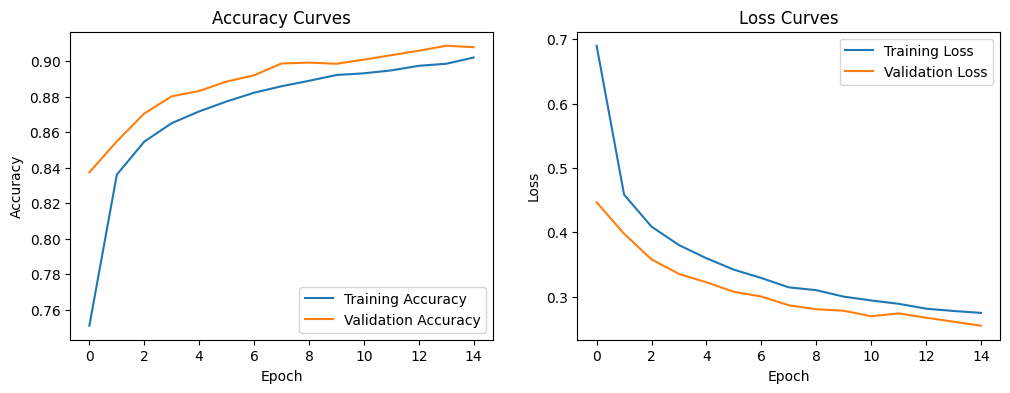

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

Test loss: 0.27170994877815247
Test accuracy: 0.9016000032424927
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


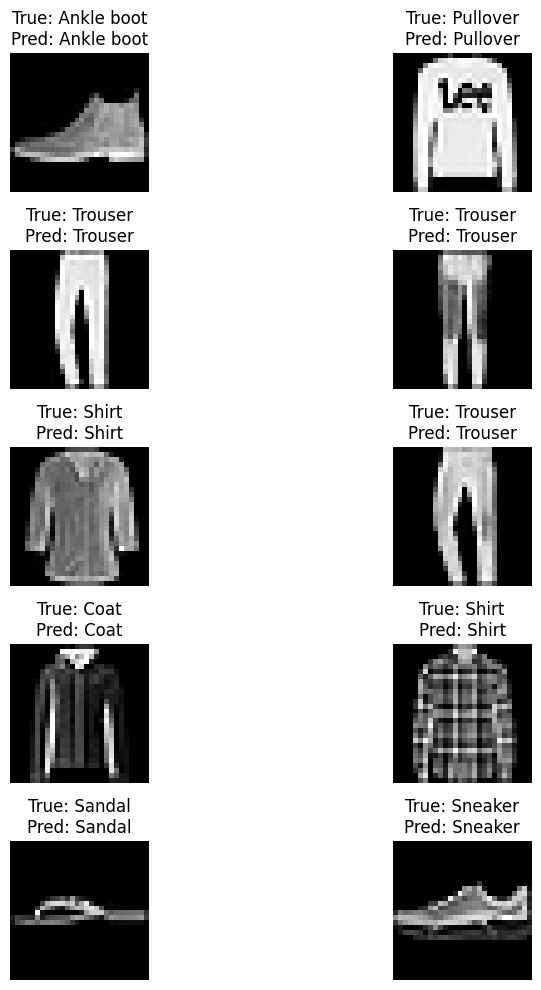

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    true_label = class_names[np.argmax(y_test[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()